In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DynamicModel_Package.ModelBase import DynamicModel


(          t              tT        iI         fF           vV
 0      0.00  1000000.000000         0          0  1000.000000
 1      0.01   999998.000000       2.0          0   980.000000
 2      0.02   999996.040004  3.939996        0.2   962.400000
 3      0.03   999994.115212  5.825388      0.592   947.091996
 4      0.04   999992.221039  7.661307   1.168618   933.975545
 ...     ...             ...       ...        ...          ...
 1996  19.96       39.603075  0.070962  11.579106     7.090574
 1997  19.97       39.603074  0.070253  11.470411     7.019724
 1998  19.98       39.603074  0.069551  11.362732     6.949582
 1999  19.99       39.603073  0.068856   11.25606     6.880141
 2000  20.00       39.603072  0.068168  11.150385     6.811395
 
 [2001 rows x 5 columns],
 <Figure size 640x480 with 4 Axes>,
 array([<AxesSubplot: title={'center': 'tT'}>,
        <AxesSubplot: title={'center': 'fF'}>,
        <AxesSubplot: title={'center': 'vV'}>,
        <AxesSubplot: title={'center': 

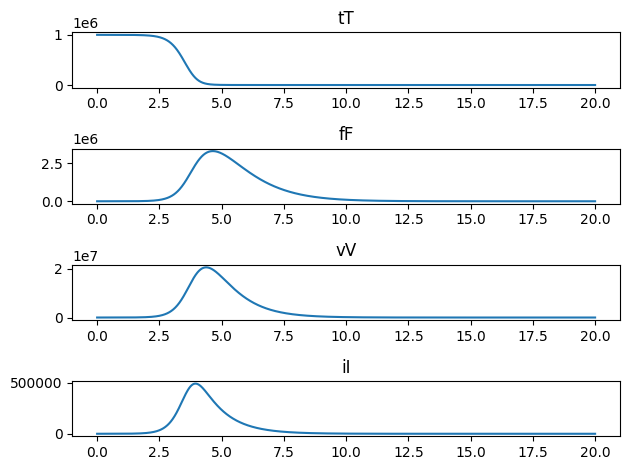

In [ ]:
#based on https://par.nsf.gov/servlets/purl/10323140

def dtTdt (variables, params):
    tT = variables['tT']
    iI = variables['iI']
    vV = variables['vV']
    fF = variables['fF']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    c = params['c']
    q = params['q']
    d = params['d']
    return -beta * vV * tT
def diIdt (variables, params):
    tT = variables['tT']
    iI = variables['iI']
    vV = variables['vV']
    fF = variables['fF']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    c = params['c']
    q = params['q']
    d = params['d']
    return beta * vV * tT - delta * iI

def dvVdt (variables, params):
    tT = variables['tT']
    iI = variables['iI']
    vV = variables['vV']
    fF = variables['fF']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    c = params['c']
    q = params['q']
    d = params['d']
    return p * iI - c * vV

def dfFdt (variables, params):
    tT = variables['tT']
    iI = variables['iI']
    vV = variables['vV']
    fF = variables['fF']
    beta = params['beta']
    delta = params['delta']
    p = params['p']
    c = params['c']
    q = params['q']
    d = params['d']
    return q * iI - d * fF



# Initial conditions
T0 = 1e6    # Uninfected cells
I0 = 0      # Infected cells
V0 = 1e3    # Initial viral load
F0 = 0      # Initial interferon level
y0 = [T0, I0, V0, F0]

# Time points (in days)
t = np.linspace(0, 10, 1000)

# Parameter values
beta = 2e-7     # Infection rate
delta = 1.0     # Death rate of infected cells
p = 100.0       # Virus production rate
c = 2.0         # Virus clearance rate
q = 10.0        # Interferon production rate
d = 1.0         # Interferon decay rate

params = {'beta': beta,'delta':delta,'p':p,'q':q, 'c':c,'d':d}
y0 = {'tT':T0,'iI':I0,'vV':V0,'fF':F0,'t':0.0}
# Solve ODEs

model = DynamicModel()
model.add_variable('tT',dtTdt,params)
model.add_variable('iI',diIdt,params)
model.add_variable('fF',dfFdt,params)
model.add_variable('vV',dvVdt,params)


model.integrate_and_plot(y0,20,0.01,True,['tT','fF','vV','iI'])


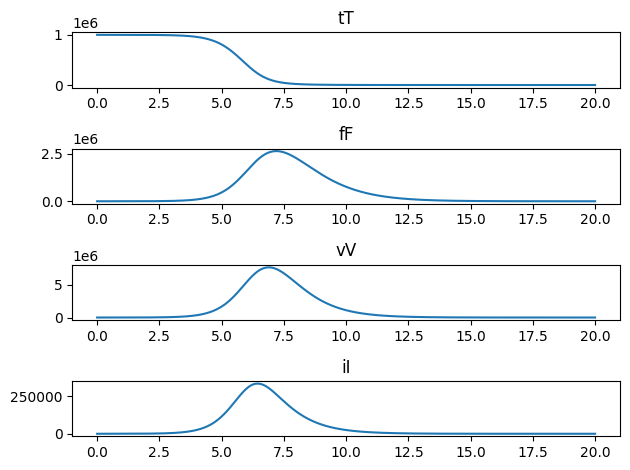

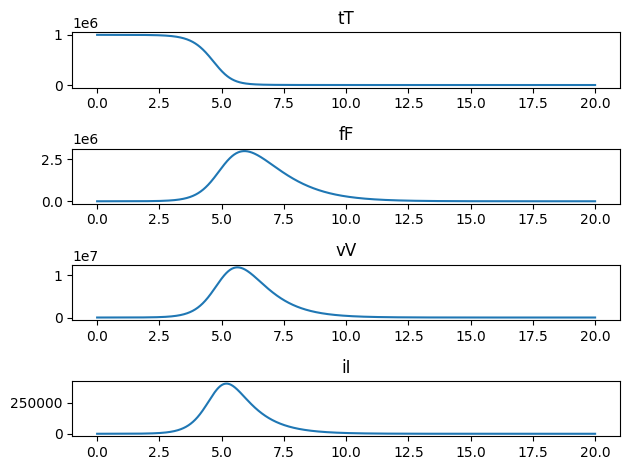

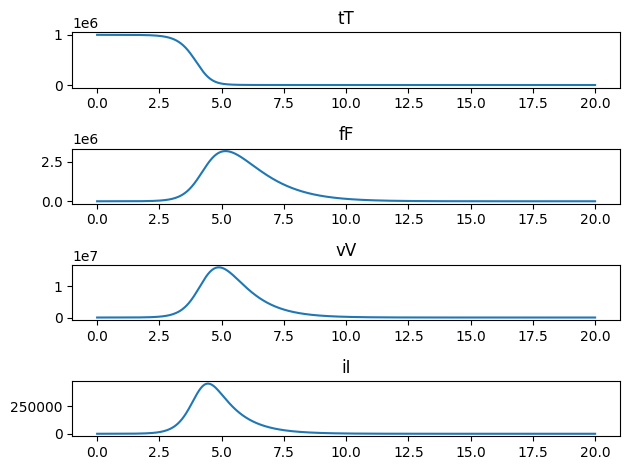

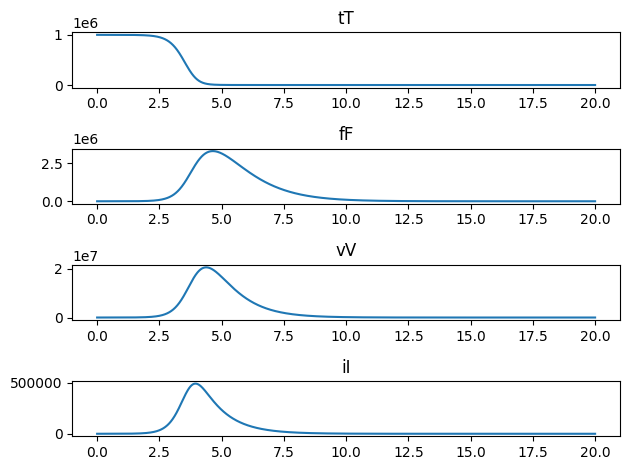

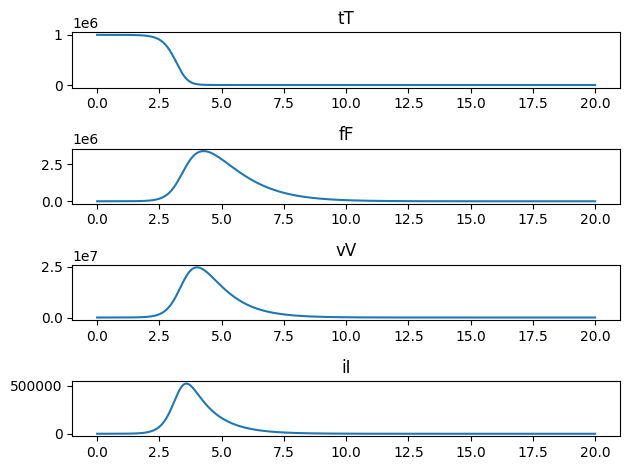

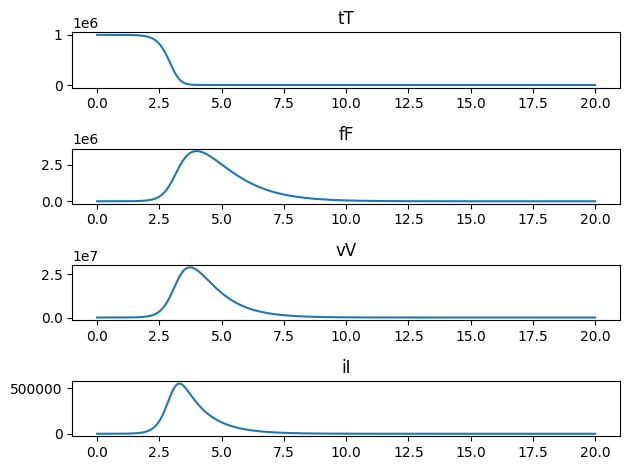

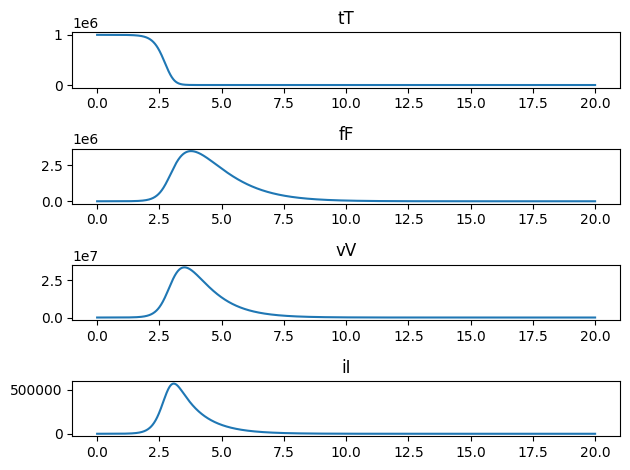

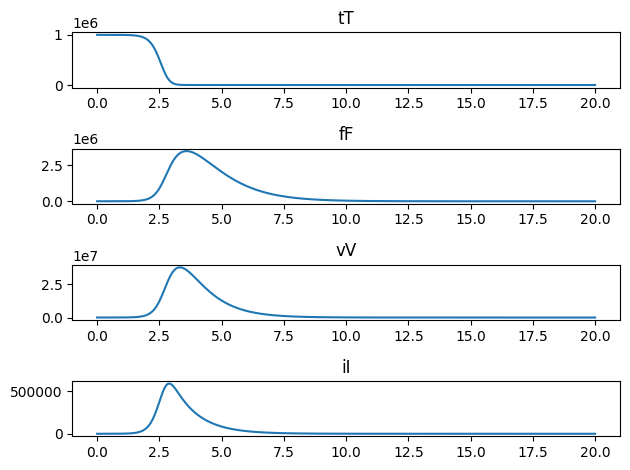

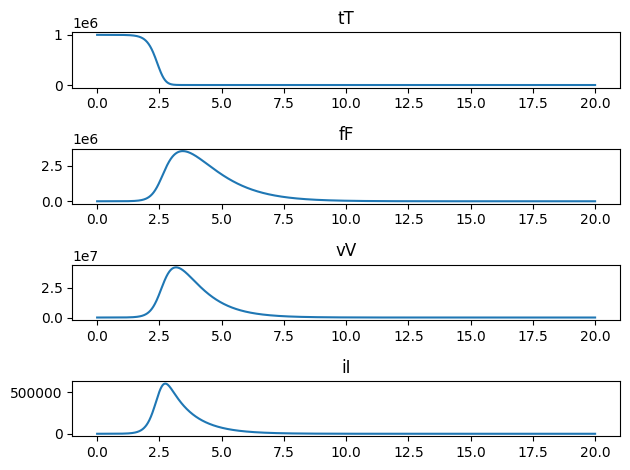

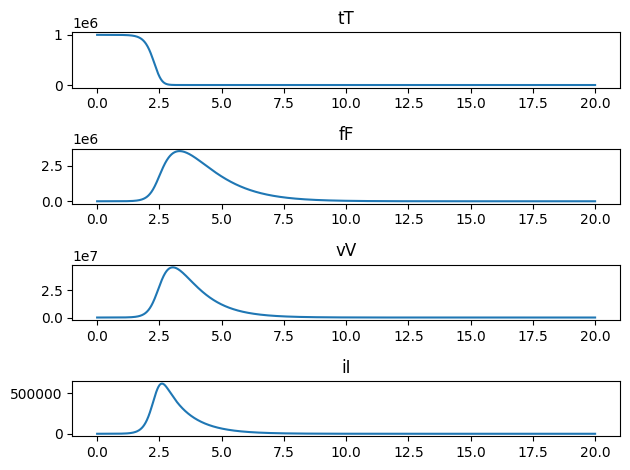

In [7]:
ps = np.linspace(50,200,10)
fwhm_fs = []
fwhm_vs = []
def compute_fwhm(t, y):
    """
    Compute Full Width at Half Maximum (FWHM) for a 1D time series y(t).
    
    Parameters:
    - t: time points (1D array)
    - y: signal values (1D array)
    
    Returns:
    - fwhm_time: duration for which y > 0.5 * max(y)
    - t_start, t_end: time bounds of FWHM interval
    """
    half_max = 0.5 * np.max(y)
    above_half = y > half_max
    if not np.any(above_half):
        return 0.0, None, None

    indices = np.where(above_half)[0]
    t_start = t[indices[0]]
    t_end = t[indices[-1]]
    fwhm_time = t_end - t_start
    return fwhm_time, t_start,  t_end
for p in ps:
    params['p'] = p
    model = DynamicModel()
    model.add_variable('tT',dtTdt,params)
    model.add_variable('iI',diIdt,params)
    model.add_variable('fF',dfFdt,params)
    model.add_variable('vV',dvVdt,params)


    df,fig,ax = model.integrate_and_plot(y0,20,0.01,True,['tT','fF','vV','iI'])

    fwhm_f,_,_ = compute_fwhm(df['t'],df['fF'])
    
    fwhm_v,_,_ = compute_fwhm(df['t'],df['vV'])
    fwhm_fs.append(fwhm_f)
    fwhm_vs.append(fwhm_v)




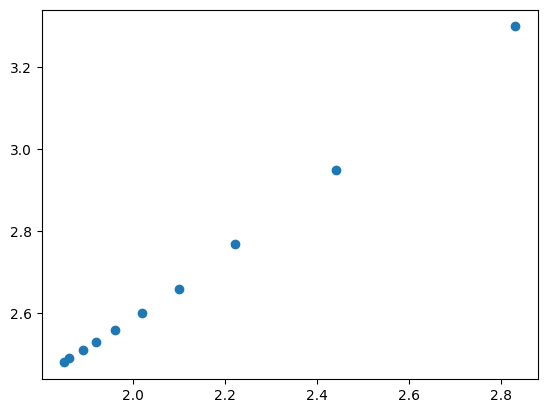

In [ ]:
fig,ax = plt.subplots()
ax.scatter(fwhm_vs,fwhm_fs)

